# Resume Screening with Machine Learning

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [17]:
resumedataset = pd.read_csv('UpdatedResumeDataSet.csv', encoding='utf-8')
resumedataset['Cleaned_resume']=''
resumedataset.head()

,Category,Resume,Cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [18]:
print("Displaying the distinct categories of resume - ")
print(resumedataset['Category'].unique())

Displaying the distinct categories of resume - 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [19]:
print("Displaying the distinct categories of resume and the number of records belonging to each category = ")
print(resumedataset['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category = 
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


## Visualize the number of categories in the dataset

<Axes: xlabel='count', ylabel='Category'>

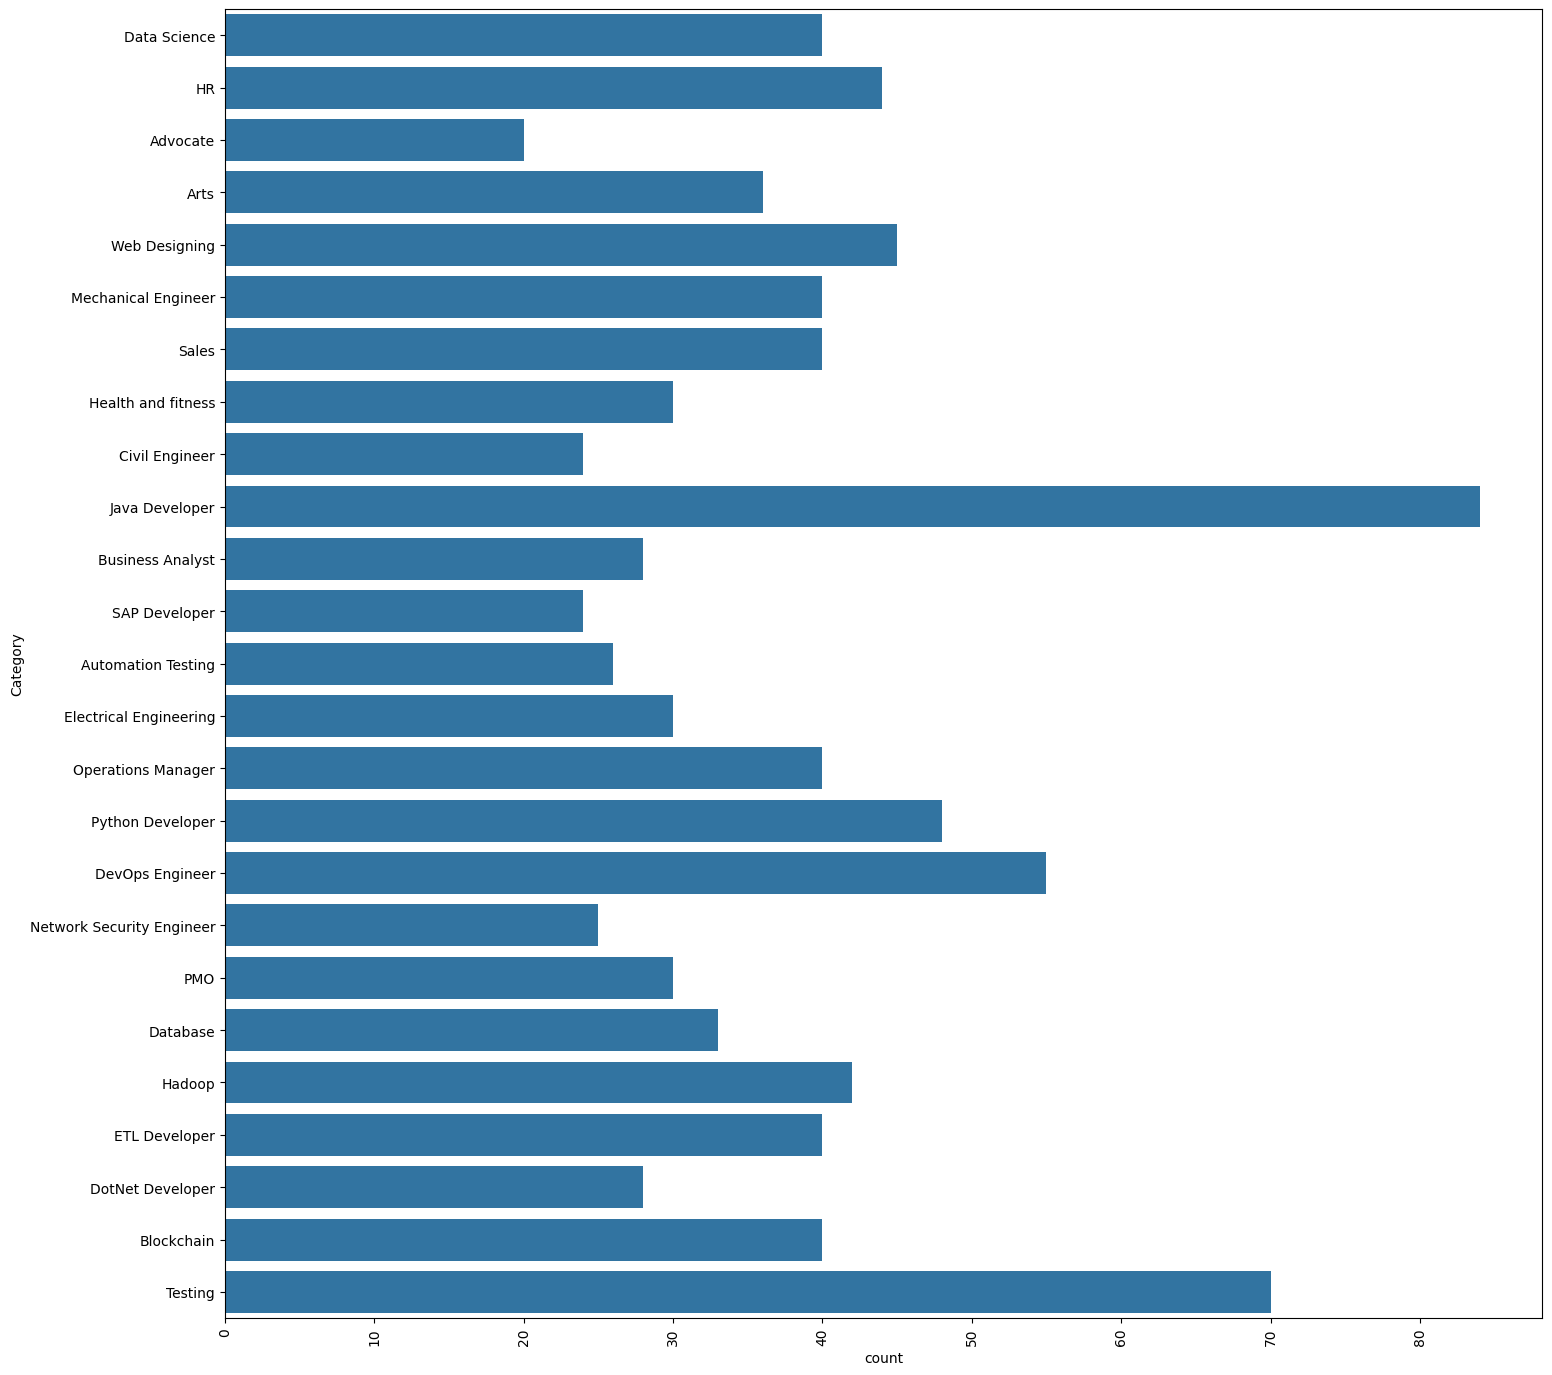

In [22]:
plt.figure(figsize=(17,17))
plt.xticks(rotation=90)
sns.countplot(y="Category", data = resumedataset)

## Visualize the distribution of categories

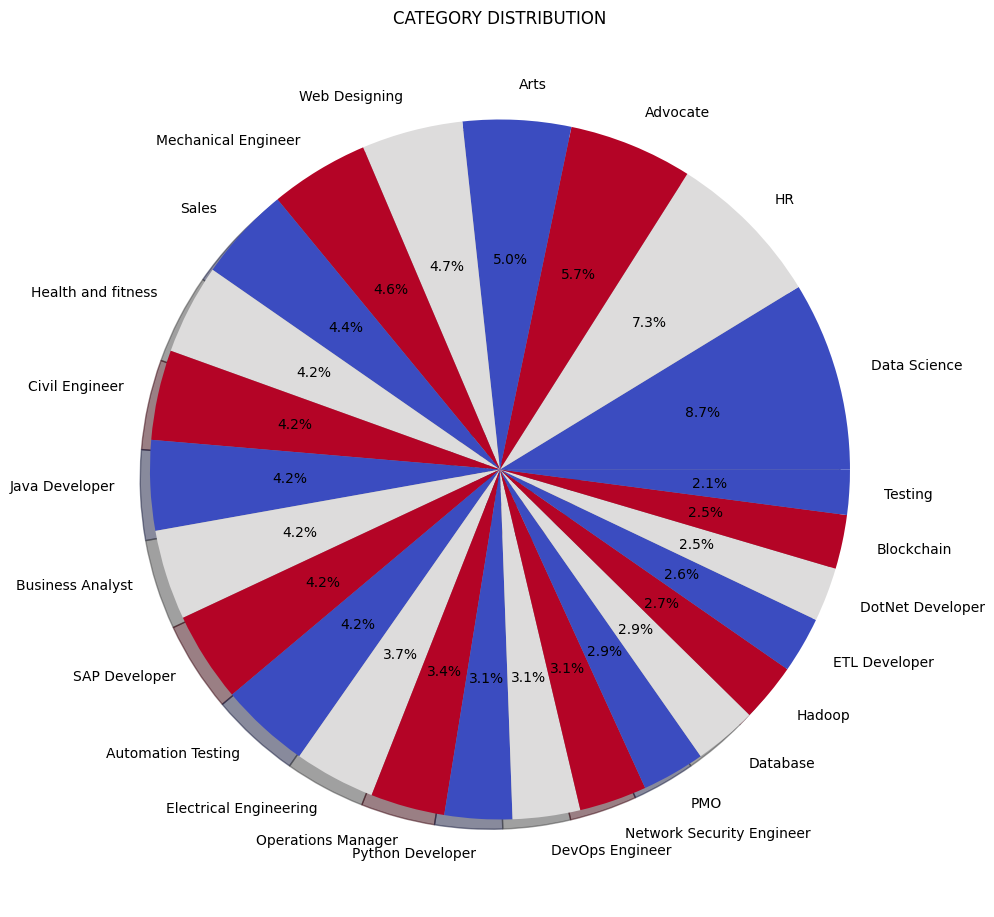

In [25]:
from matplotlib.gridspec import GridSpec
targetCounts = resumedataset['Category'].value_counts()
targetLabels = resumedataset['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [55]:
def cleanresume(resumeText):
    resumeText = re.sub('http\S+\s*',' ',resumeText) #remove URLs
    resumeText = re.sub('RT|cc',' ',resumeText) #remove RT and cc
    resumeText = re.sub('#\S+',' ',resumeText) #rmove hashtags
    resumeText = re.sub('@\S+',' ',resumeText) #remove mentions
    resumeText = re.sub('[%s]'%re.escape("""!"#$%&'()"+,-./:;<=>?@[\]^_'{!}~"""), ' ',resumeText) # remove punctuation"""' 
    resumeText = re.sub(r'[^\x00-\x7f]',r' ',resumeText) #rmove extra whitespace
    return resumeText

resumedataset['cleaned_resume']=resumedataset.Resume.apply(lambda x: cleanresume(x))

In [56]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


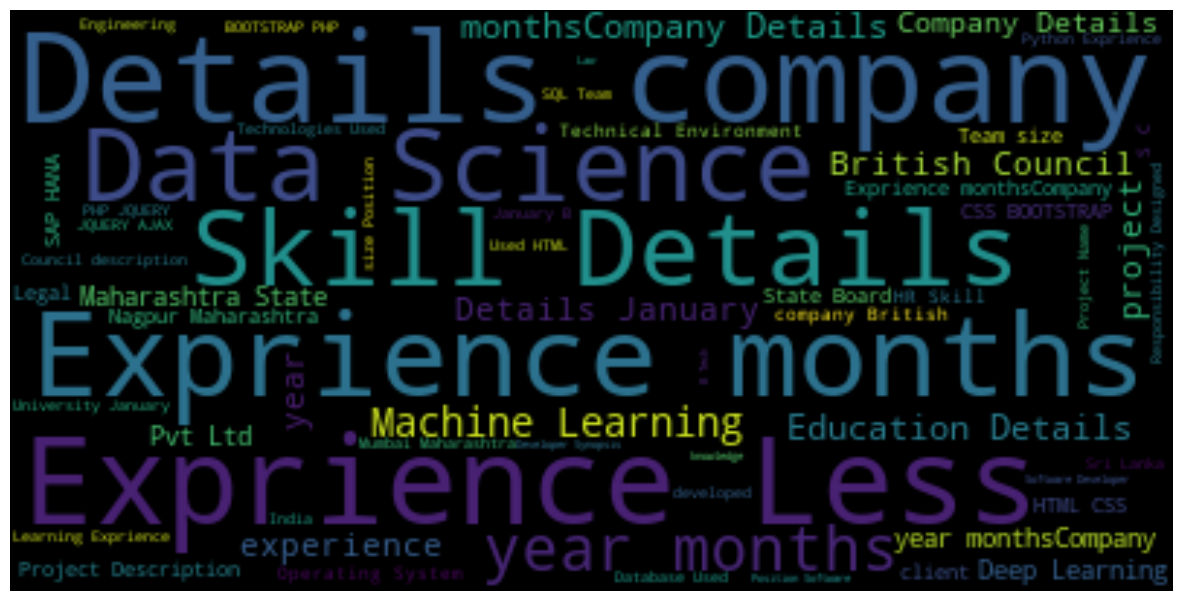

In [57]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

onesetofstopwords = set(stopwords.words('english')+["''","``"])
totalWord = []
Sentence = resumedataset['Resume'].values
cleanedSentence = ""
for i in range(0,160):
    cleanedText = cleanresume(Sentence[i])
    cleanedSentence += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in onesetofstopwords and word not in string.punctuation:
            totalWord.append(word)

wordfreqdist = nltk.FreqDist(totalWord)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentence)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumedataset[i] = le.fit_transform(resumedataset[i])

## Using model of machine learning for train the dataset

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumedataset['cleaned_resume'].values
requiredTarget = resumedataset['Category'].values

word_vectorizer = TfidfVectorizer(
        sublinear_tf=True,
        stop_words='english',
        max_features=1500)

# Fit and transform the text data
word_vectorizer.fit(requiredText)
Wordfeatures = word_vectorizer.transform(requiredText)

print("Feature extraction completed...")

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(Wordfeatures, requiredTarget, random_state=0, test_size=0.2)
    
print(x_train.shape)
print(y_train.shape)

Feature extraction completed...
(769, 1500)
(769,)


## make classification of the trained model

In [63]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

print("\n Classification report for classifier %s: \n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1